[maddpg_algorithm]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/MADDPG/picures/maddpg_algorithm.png "Algorithm of MADDPG"

[maddpg_digram]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/MADDPG/picures/maddpg_diagram.png "Diagram of MADDPG"

[img_maddpg_version_11]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/MADDPG/picures/MADDPG_version_11.png "Score of Version 11"


# Abstract
This work adopts [MADDPG](https://arxiv.org/abs/1706.02275) to play tennis game which is similar to [Unity's Tennis game](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#tennis) and achieve a score of 2.7. The average score reaches +0.5 at episode 466.

# Introduction
By looking at the highlighted text in [MADDPG](https://arxiv.org/abs/1706.02275) algorithm shown below, the major difference between MADDPG and DDPG is the input shape of critic. Note that, x = \[o1, o2, ..., oN\]. The input size of critic in MADDPG algorithm is __(state_size+action_size)*num_agents__. On the other hand, the input size of actor in MADDPG algorithm is the same as DDPG, i.e. __state_size__.

![Algorithm of MADDPG][maddpg_algorithm]

*Algorthm of MADDPG*


Furthermore, the diagram shown below also illustrate this subtile difference. For N agents, there are N policy-networks, N Q-networks, and only 1 replay buffer.

![Diagram of MADDPG][maddpg_digram]

*Diagram of MADDPG*

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100. 


# Results
The average score reaches +0.5 at episode 466. The highest score is 2.7 at episode 937. The stability of score is still an issue despite adding batch normalization.

![Score of MADDPG version 11][img_maddpg_version_11]


# Appendix

### Hyper-Parameters
* state_size : 24
* action_size : 2
* lr_critic : 1e-3 (learning rate of critic using Adam optimizer)
* lr_actor : 1e-3  (learning rate of actor using Adam optimizer)
* fc1_units : 256
* fc2_units : 128
* gamma : 0.95     (discount rate of reward)
* tau : 1e-2       (parameter of soft update)
* max_norm : 1.0   (gradient clipping)
* epsilon_start : 5.0     (starting ratio of exploration)
* epsilon_end : 0.0       (ending ratio of exploration)
* epsilon_decay : 0.99    (decay rate of exploration)
* learn_period : 10       (training period)
* learn_sampling_num :10  (number of training in each period)
* buffer_size : int(1e6)
* batch_size : 256


### Design Patterns
Because each agent needs the other agent to predict its next actions, the [chain-of-responsibility](https://en.wikipedia.org/wiki/Chain-of-responsibility_pattern) design pattern, i.e. broker chain, is used in this project. The Game() class stores 2 agents and each agent also contains Game() class.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


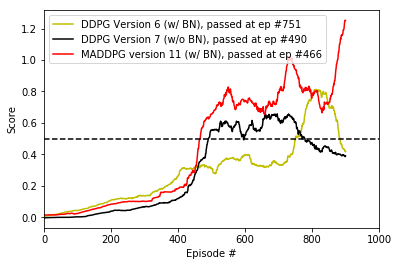

In [5]:
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcelsV2

score_parcels_v2 = [
                ScoreParcelsV2('DDPG Version 6 (w/ BN)', '../DDPG/logs/log_DDPG_version_6.pickle', 'y', 0.5),
                ScoreParcelsV2('DDPG Version 7 (w/o BN)', '../DDPG/logs/log_DDPG_version_7.pickle', 'k', 0.5),
                ScoreParcelsV2('MADDPG version 11 (w/ BN)', './logs/log_MADDPG_version_11_batch_size_256_2nd_run.pickle', 'r', 1.0),]

utils.plot_scores_v3(score_parcels_v2, 
                  size_window=100,
                 max_len=1000,
                 show_origin=False,
                    margin=0, show_episode_on_label=True)

In [1]:
import numpy as np

class ActionQuery():
    def __init__(self):
        self.result = None
        

class Game():
    def __init__(self):
        self.players = []
        self.index = 0
        
    def accept(self, player):
        self.players.append(player)
        
        
    def __iter__(self):
        self.index = 0
        return self
    
    
    def __next__(self):
        if self.index < self.__len__():
            player = self.players[self.index]
            self.index += 1
            return player
        else:
            raise StopIteration
    
    
    def __len__(self):
        return len(self.players)
        
        
class Player():
    def __init__(self, game, version):
        self.game = game
        self.version = version
        
        
    def forward_all(self):
        actionQuery = ActionQuery()
        for i_player, player in enumerate(self.game):
            print(i_player)
            player.query(actionQuery)
        
        return actionQuery.result
    
    
    def query(self, actionQuery):
        if actionQuery.result is None:
            actionQuery.result = self.version
        else:
#             actionQuery.result = np.concatenate(actionQuery.result, self.version)
            actionQuery.result = np.concatenate((actionQuery.result, self.version), axis=0)
            
            
game = Game()
player_0 = Player(game, np.array([0, 1]))
player_1 = Player(game, np.array([2, 3]))

game.accept(player_0)
game.accept(player_1)

print(player_0.forward_all())
print(player_0.forward_all())
print(player_0.forward_all())

0
1
[0 1 2 3]
0
1
[0 1 2 3]
0
1
[0 1 2 3]
